# K Nearest Neighbors & Naive Bayes with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['TARGET CLASS'], axis=1), df['TARGET CLASS'],
                                                    test_size=0.30)

In [7]:
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
df_feat = pd.DataFrame(X_train_scaled, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.583792,0.049910,0.317170,-1.709511,-0.170449,-1.120856,-0.089298,-0.833304,0.515990,0.313442
1,0.775130,-0.074584,-0.198463,-1.460336,-1.378270,-0.502057,-1.281105,-0.447875,0.865160,-0.689406
2,-0.788798,0.723176,-0.634886,0.633330,0.160144,0.506535,1.025055,1.416045,-2.127939,0.172660
3,-0.927279,-0.275251,1.595789,0.756776,-0.243320,2.746594,0.676013,1.762229,-1.076434,-1.343224
4,-1.033004,-2.607846,1.131244,0.517691,-0.440324,1.741033,2.021930,0.201963,0.640417,-1.427786


## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [12]:
X_test_scaled = scaler.transform(X_test)

In [13]:
pred = knn.predict(X_test_scaled)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

In [15]:
print(confusion_matrix(y_test,pred))

[[132  19]
 [ 13 136]]


In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.88      0.91      0.89       149

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [18]:
print(roc_auc_score(y_test, pred))

0.8934619316414063


## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [21]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

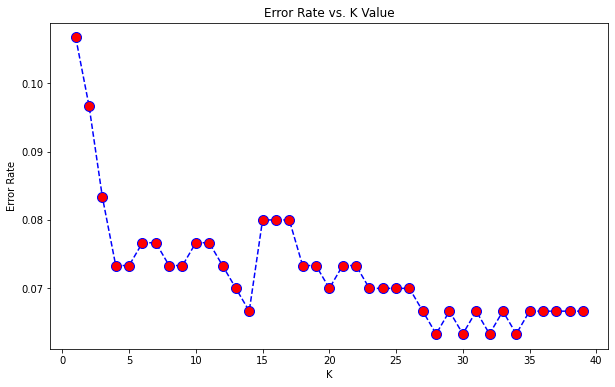

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [24]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[132  19]
 [ 13 136]]


              precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.88      0.91      0.89       149

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [25]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=23


[[136  15]
 [  6 143]]


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       151
           1       0.91      0.96      0.93       149

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [28]:
roc_auc_score(y_test, pred)

0.930196897639895

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb = GaussianNB()

In [32]:
y_pred = gnb.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [33]:
print("Number of mislabeled points out of a total %d points : %d"  % (X_test_scaled.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 300 points : 20


In [34]:
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))



[[139  12]
 [  8 141]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       151
           1       0.92      0.95      0.93       149

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [35]:
roc_auc_score(y_test, y_pred)

0.9334192630783591